In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [2]:
# mpl.use("pgf")  # to display graphs remove this line
mpl.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
line = 0.75

In [3]:
# general settings for signal and noise
sample_freq = 1e6  # in Hz
length = 0.5  # in s
signal_power = 0.0  # in dB
noise_power = 0.0  # in dB

# create the signal (the 'soft speaker' kind)
wm = ss.WirelessMicrophone(f_sample=sample_freq, t_sec=length, seed=None)
sig = wm.soft(f_center=-1e5, power=signal_power, dB=True)

# create the noise
wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length, seed=None)
noise = wgn.signal(power=noise_power, dB=True)

# ensure noise and signal have same length (and create global variable 'num_samples')
assert wm.num_samples == wgn.num_samples
num_samples = wm.num_samples

# create actual signal ('both') comprising of signal and additive white Gaussian noise (AWGN)
both = sig + noise

# print some info about signal and noise
print('Signal power: %.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:  %.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:          %.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Num samples:  %d' % (num_samples))

# ensure that Parseval's theorem holds
ss.util.check_parseval(both, length, sample_freq)

Signal power: -0.00 dB
Noise power:  0.00 dB
SNR:          -0.00 dB
Num samples:  500000


In [4]:
# plt.figure(figsize=(6, 3))
# sft = ss.Stft(n=1024, window='flattop')
# f, t, x = sft.spectogram(both, sample_freq, normalized=True, dB=True)
# plt.pcolormesh(t,
#                f,
#                x,
#                cmap='viridis',
#                vmin=np.min(x),
#                vmax=np.max(x))
# plt.xlabel(r'Time [s]')
# plt.ylabel(r'Frequency [Hz]')
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.savefig('out/narrowband_spec.png', dpi=1200)

In [5]:
# general settings for signal and noise
sample_freq = 1e6  # in Hz
length = 1.0  # in s
signal_power = 0.0  # in dB
noise_power = -15.0  # in dB

# create the signal (the 'soft speaker' kind)
wm = ss.WirelessMicrophone(f_sample=sample_freq, t_sec=length, seed=None)
sig = wm.soft(f_center=1e4, power=signal_power, dB=True)

# create the noise
wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length, seed=None)
noise = wgn.signal(power=noise_power, dB=True)

# ensure noise and signal have same length (and create global variable 'num_samples')
assert wm.num_samples == wgn.num_samples
num_samples = wm.num_samples

# create actual signal ('both') comprising of signal and additive white Gaussian noise (AWGN)
both1 = sig + noise

# print some info about signal and noise
print('Signal power: %.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:  %.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:          %.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Num samples:  %d' % (num_samples))

# ensure that Parseval's theorem holds
ss.util.check_parseval(both1, length, sample_freq)

Signal power: 0.00 dB
Noise power:  -15.00 dB
SNR:          15.00 dB
Num samples:  1000000


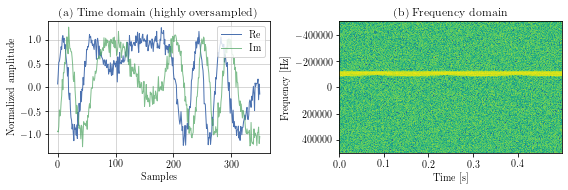

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 2.75))

axs[0].plot(both1[0:350].real, '-', linewidth=1, aa=True)
axs[0].plot(both1[0:350].imag, '-', linewidth=1, alpha=0.75, aa=True)
axs[0].legend(('Re', 'Im'), loc=1)
axs[0].set_xlabel(r'Samples')
axs[0].set_ylabel(r'Normalized amplitude')
axs[0].set_title(r'(a) Time domain (highly oversampled)')
axs[0].set_ylim([-1.4, 1.4])
axs[0].grid(linewidth=0.5)

sft = ss.Stft(n=1024, window='flattop')
f, t, x = sft.spectogram(both, sample_freq, normalized=True, dB=True)
axs[1].pcolormesh(t,
               f,
               x,
               cmap='viridis',
               vmin=np.min(x),
               vmax=np.max(x))
axs[1].set_xlabel(r'Time [s]')
axs[1].set_ylabel(r'Frequency [Hz]')
axs[1].set_title(r'(b) Frequency domain')
axs[1].invert_yaxis()

plt.tight_layout()
plt.savefig('out/chap4/narrowband.png', dpi=1200)